# Time Series Analysis

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.columns = ['Date','Number of Passengers']

In [ ]:
data.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.columns

Index(['Date', 'Number of Passengers'], dtype='object')

# Visualise the Time Series

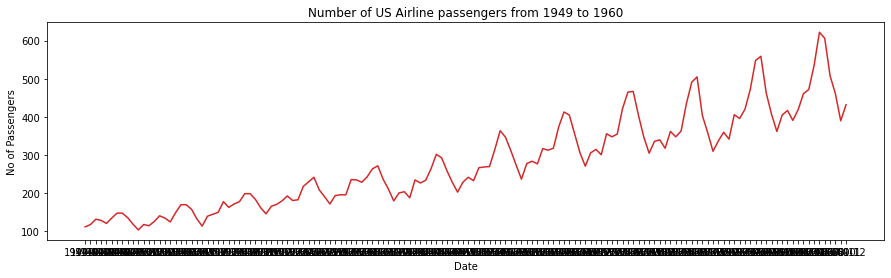

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data['Date'],data['Number of Passengers'],color='tab:red')
plt.title('Number of US Airline passengers from 1949 to 1960')
plt.xlabel('Date')
plt.ylabel('No of Passengers')
plt.show()

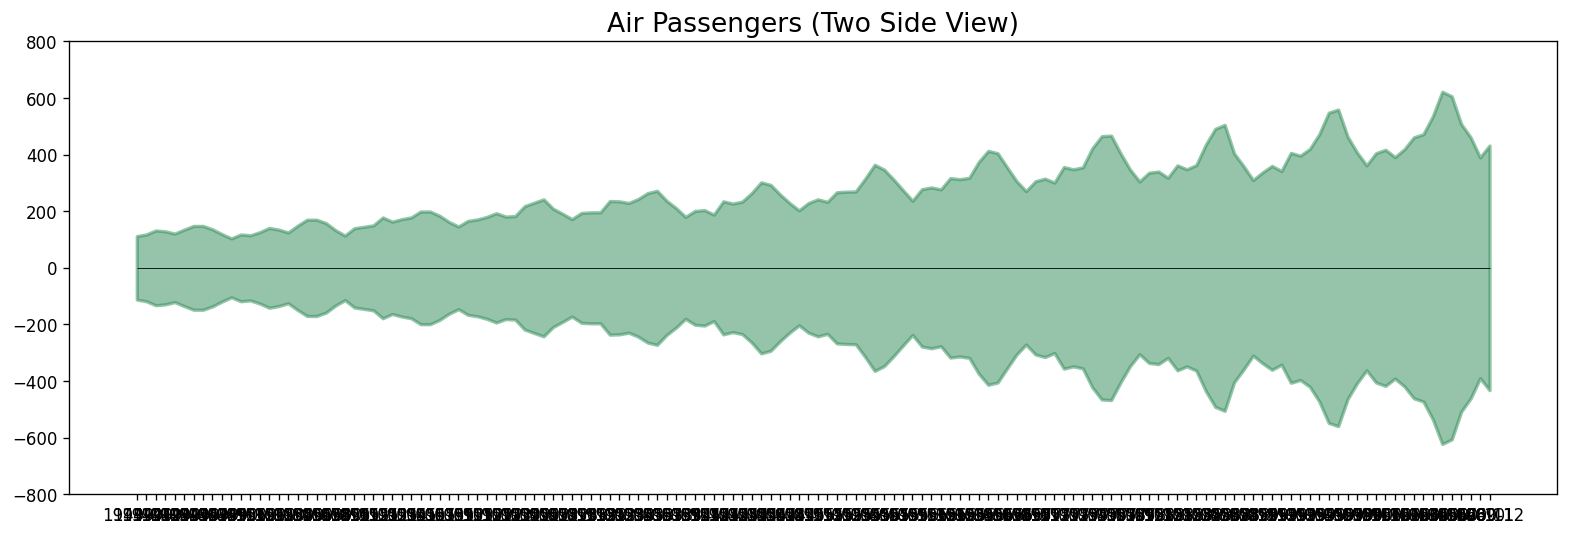

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x=data['Date'].values,y1=data['Number of Passengers'].values ,y2=-(data['Number of Passengers']),alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(data['Date']), xmax=np.max(data['Date']), linewidth=.5)
plt.show()

# Pattern in a Time Series

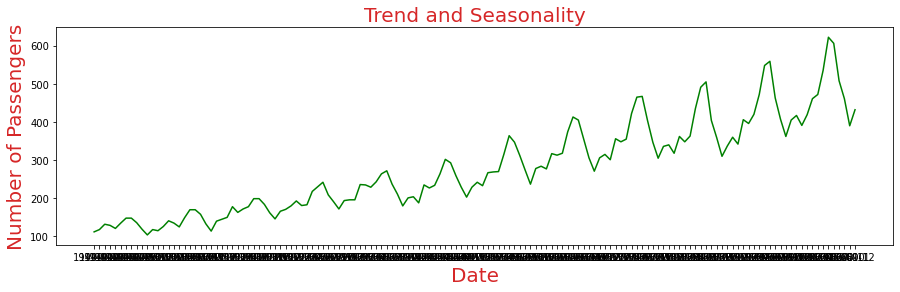

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data['Date'],data['Number of Passengers'],color='green')
plt.title('Trend and Seasonality',fontsize=20,color='tab:red')
plt.xlabel('Date',fontsize=20,color='tab:red')
plt.ylabel('Number of Passengers',fontsize=20,color='tab:red')
plt.show()

# Additive and Multiplicative Time Series

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error

#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error



#__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________############

# Decomposition of Time Series

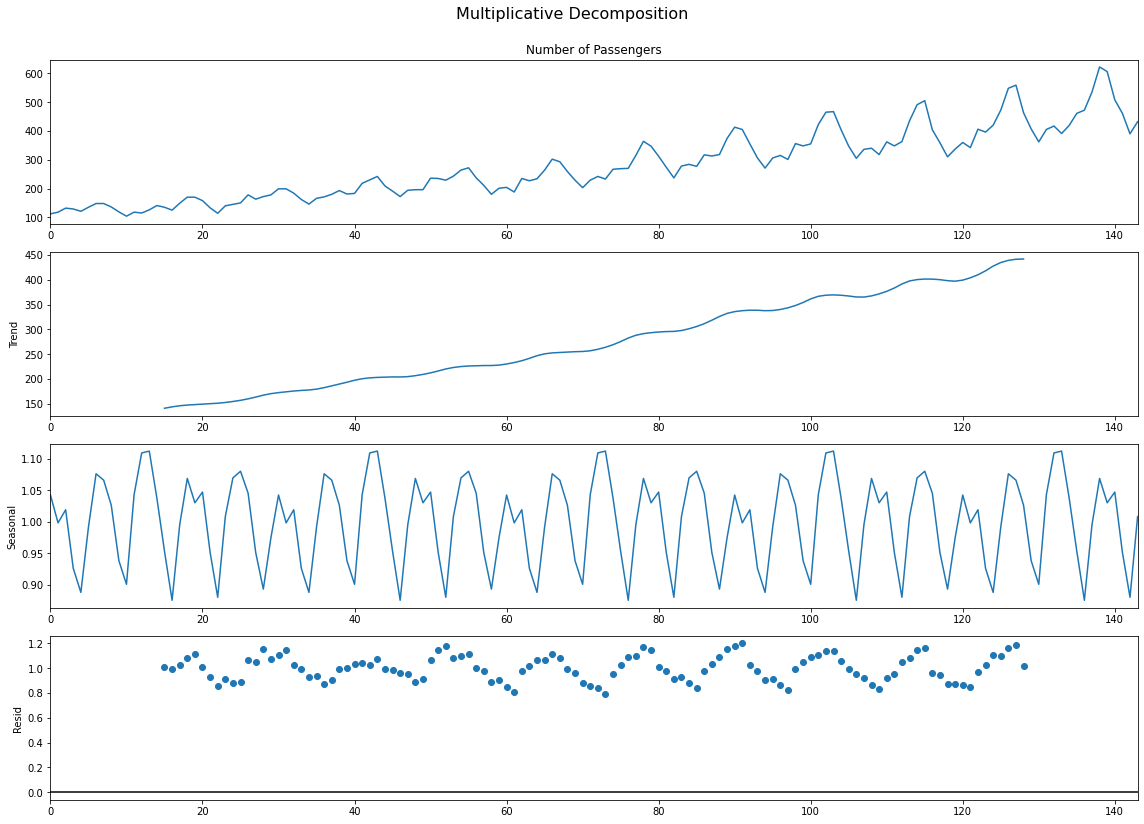

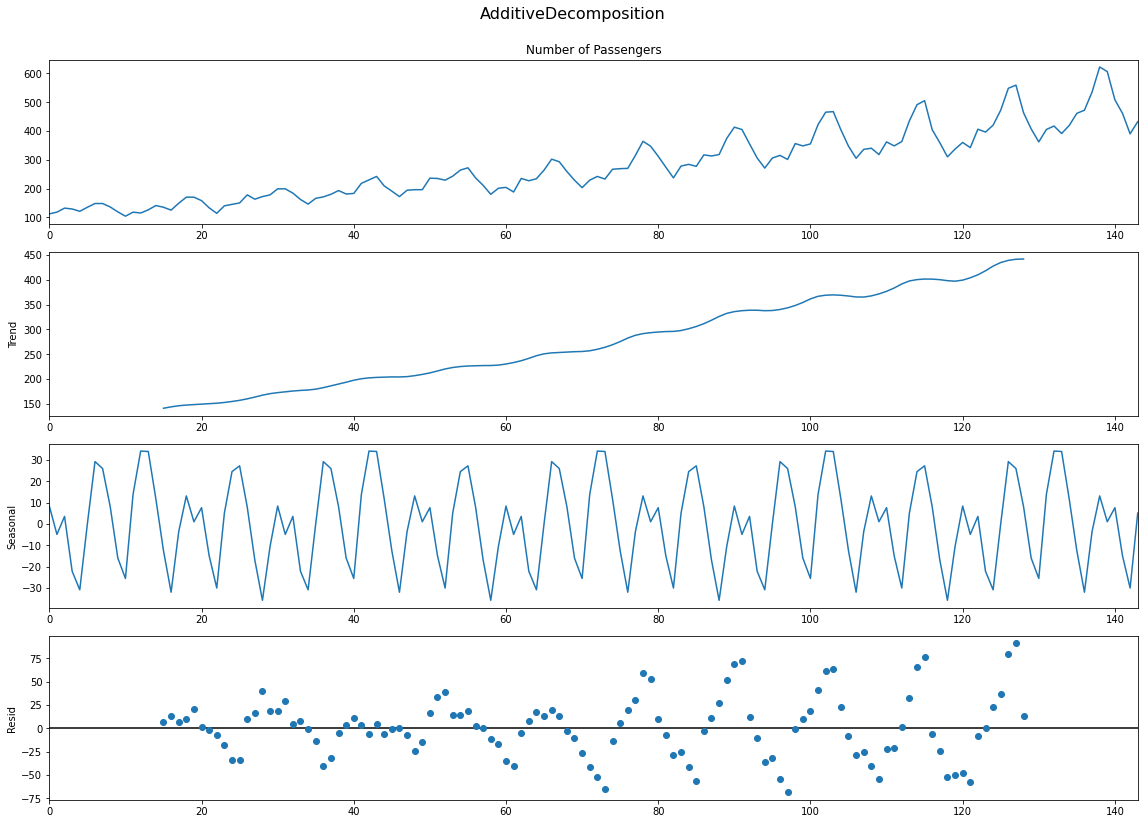

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
MD = seasonal_decompose(data['Number of Passengers'],model='multiplicative',period=30)
# Additive Decomposition
AD = seasonal_decompose(data['Number of Passengers'],model='additive',period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
MD.plot().suptitle('Multiplicative Decomposition',fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])

AD.plot().suptitle('AdditiveDecomposition',fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])

plt.show()

# Stationary and non-Stationary Time Series

# White Noise
# Mathematically, a sequence of completely random numbers with mean zero is a white noise.

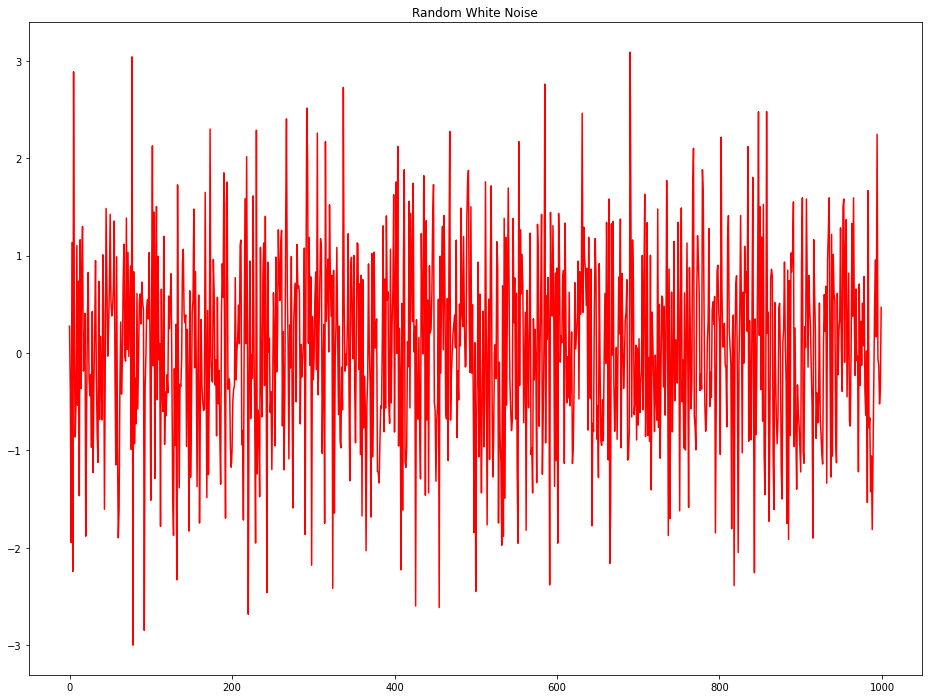

In [ ]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='r')
plt.show()

# Detrend a Time Series

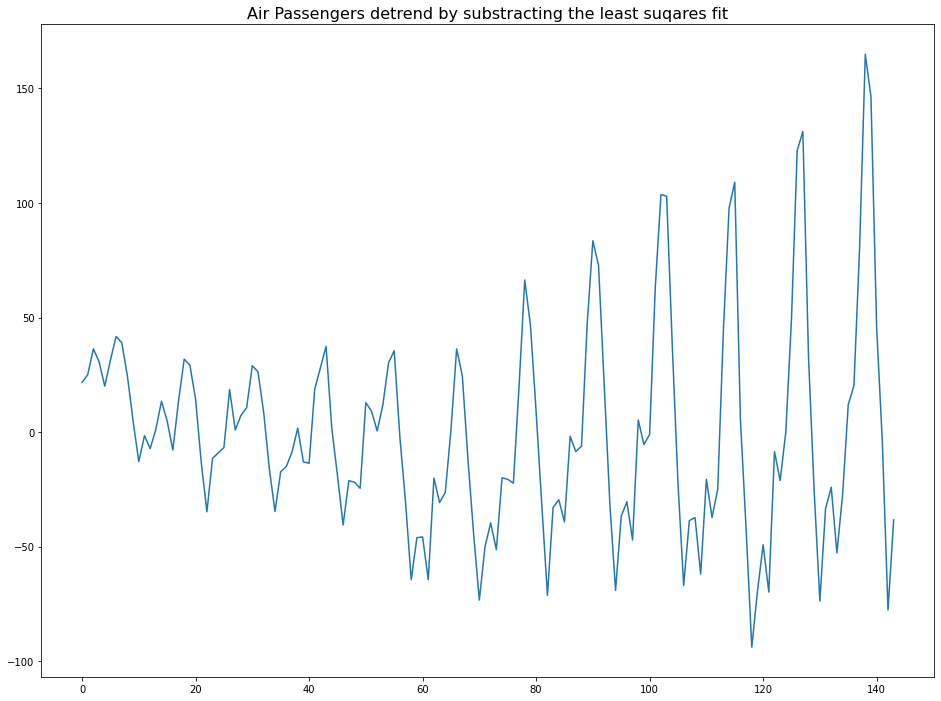

In [ ]:
# Using scipy : Substract the line of best fit

from scipy import signal
detrended = signal.detrend(data['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrend by substracting the least suqares fit',fontsize=16)
plt.show()

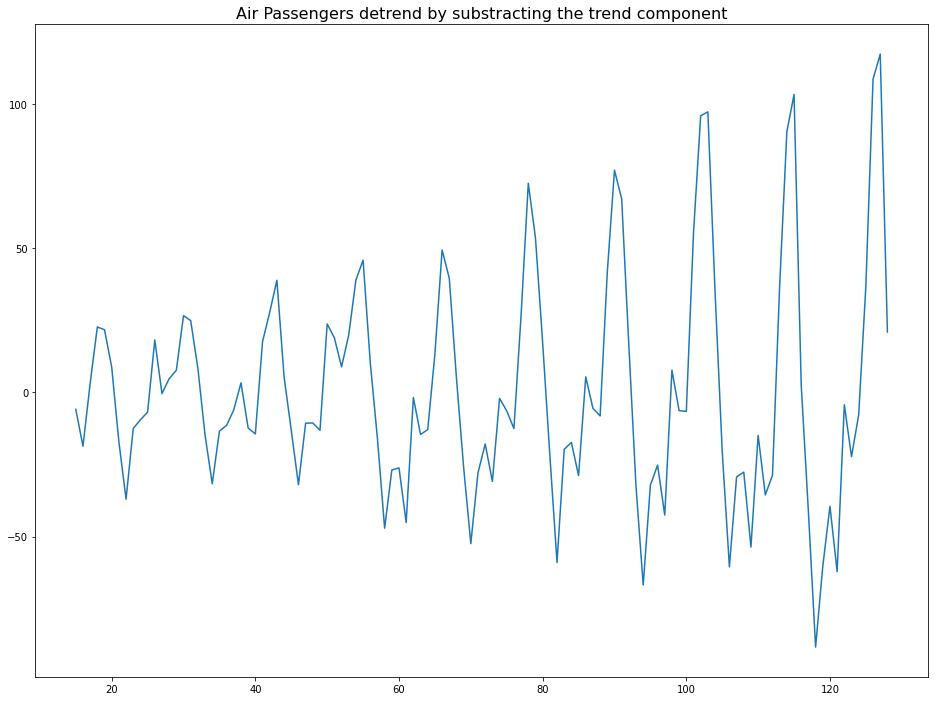

In [ ]:
# Using statsmodels : Substracting the Trend Component

from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(data['Number of Passengers'],model='multiplicative',period=30)
detrended = data['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrend by substracting the trend component',fontsize=16)
plt.show()

# Deseasonalize a Time Series

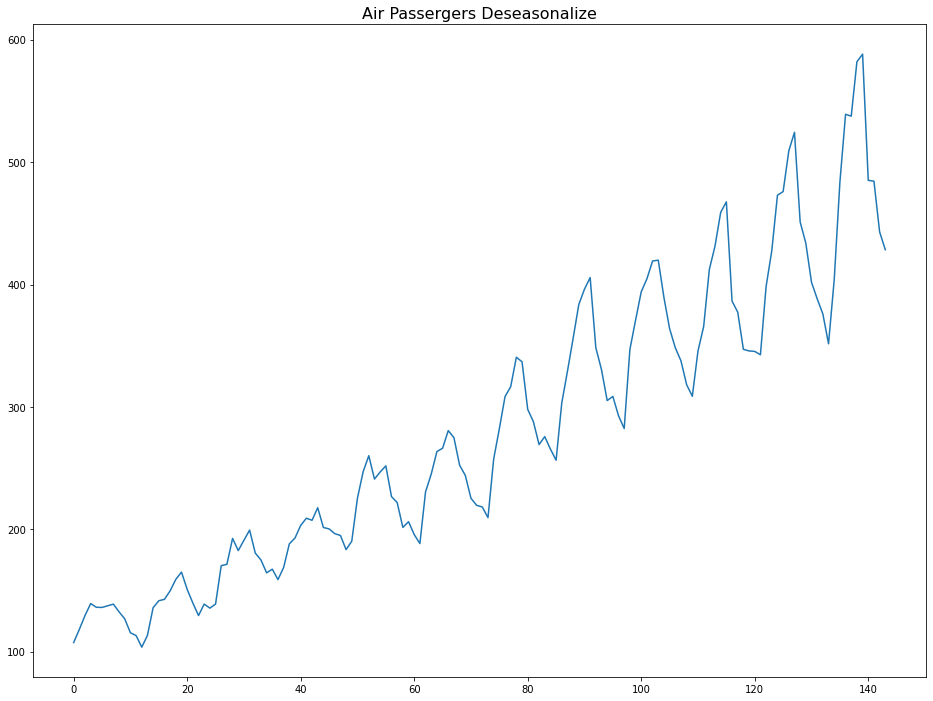

In [ ]:
# Subtracting the Trend Component

#  Time Series Decomposition
result_mul = seasonal_decompose(data['Number of Passengers'],model='multiplicative',period=30)

# Deseasonalize
Deseasonalize = data['Number of Passengers'].values/result_mul.seasonal

# Plot 
plt.plot(Deseasonalize)
plt.title('Air Passergers Deseasonalize',fontsize=16)
plt.show()

# How to test for seasonality of a time series?

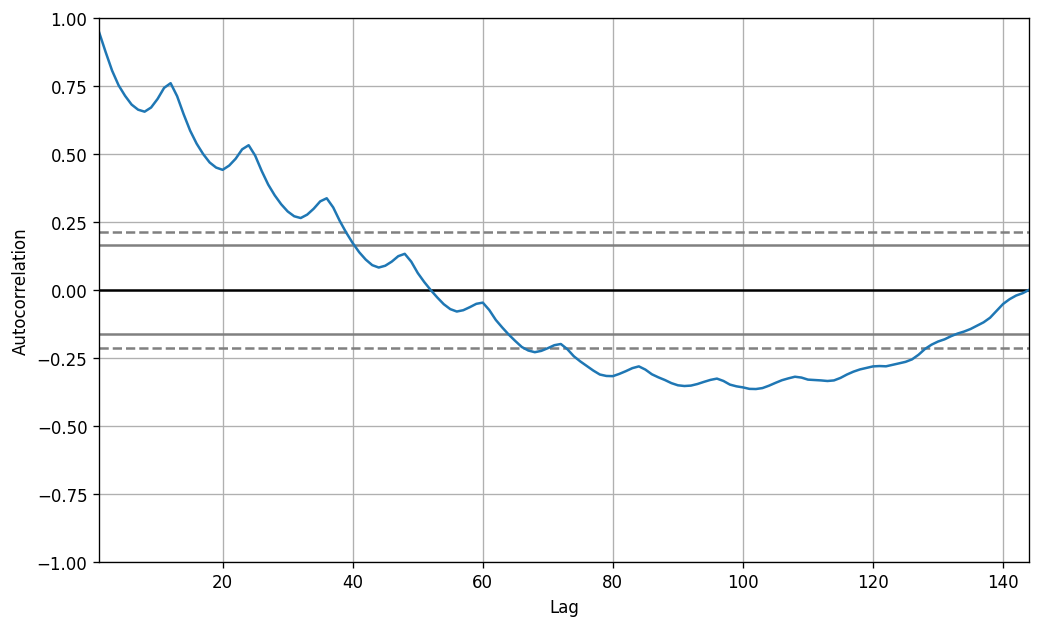

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(data['Number of Passengers'].tolist())

# Autocorrelation and Partial Autocorrelation Functions 

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


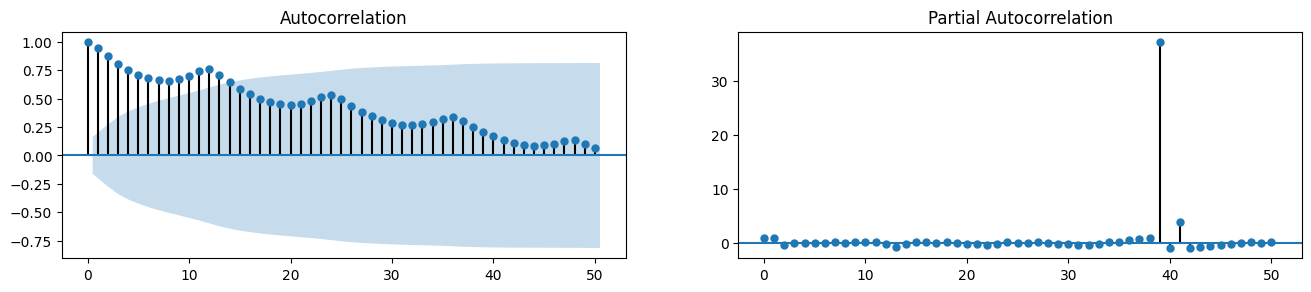

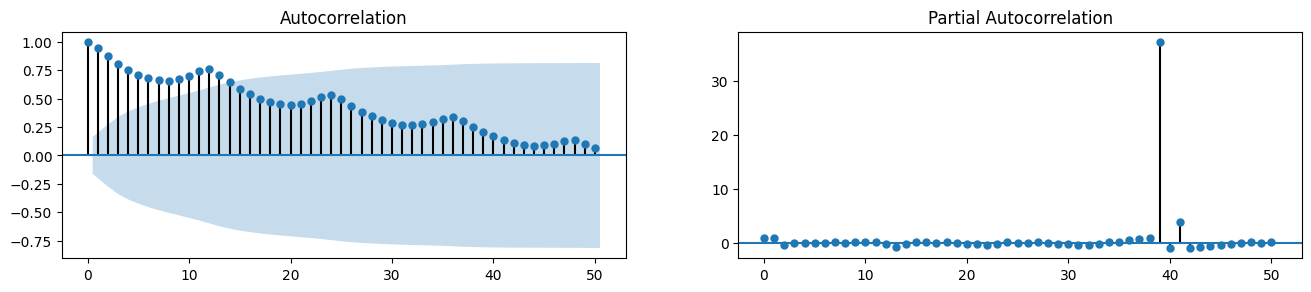

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['Number of Passengers'].tolist(), lags=50, ax=axes[1])


# Load new dataset 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/dataset.txt')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


# ADF Test for checking model stationrity

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log 
result = adfuller(df.value.dropna())
print('ADF Statistics: %f' % result[0])
print('P-value: %f' % result[1])


ADF Statistics: 3.145186
P-value: 1.000000


# Differincing the Series

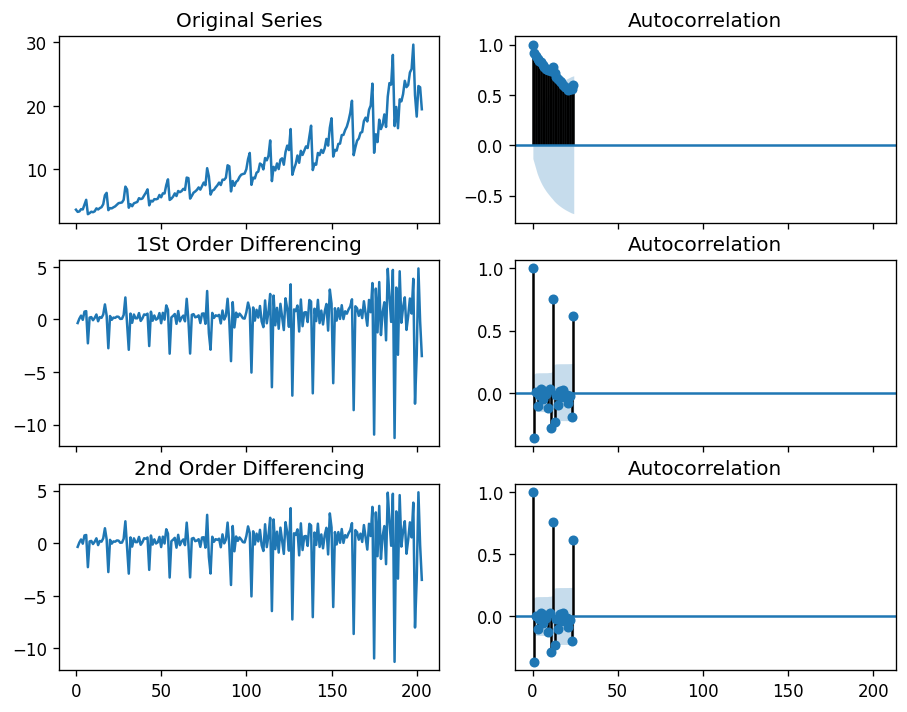

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.rcParams.update({'figure.figsize':(9,7),'figure.dpi':120})

# Original Series
fig,axes = plt.subplots(3,2,sharex=True)
axes[0,0].plot(df.value);axes[0,0].set_title('Original Series')
plot_acf(df.value,ax=axes[0,1])

# 1st defferencing
axes[1,0].plot(df.value.diff()); axes[1,0].set_title('1St Order Differencing')
plot_acf(df.value.diff().dropna(),ax=axes[1,1])

# 2nd defferencing
axes[2,0].plot(df.value.diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().dropna(),ax=axes[2,1])

plt.show()

# Finding value of AR(P) using PACF
# Yt= α0 + α1Yt−1 + α2Yt−2 + α3Yt−3

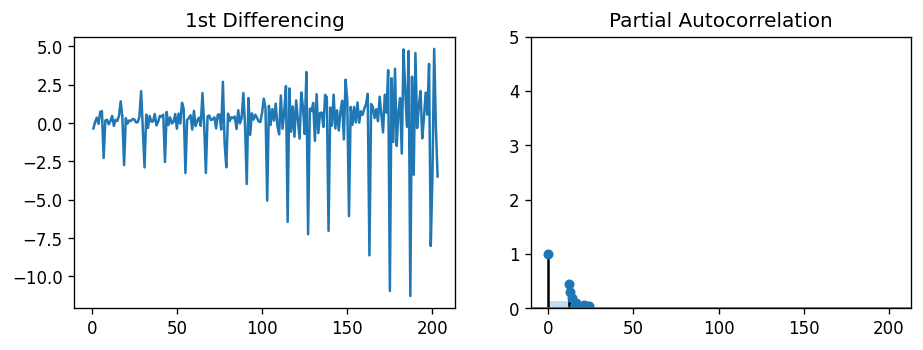

In [ ]:
# PACF plot of 1st differenced series

plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})

fig,axes = plt.subplots(1,2,sharex=True)
axes[0].plot(df.value.diff());axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(),ax=axes[1])

plt.show()

# finding value of MA(q) using acf


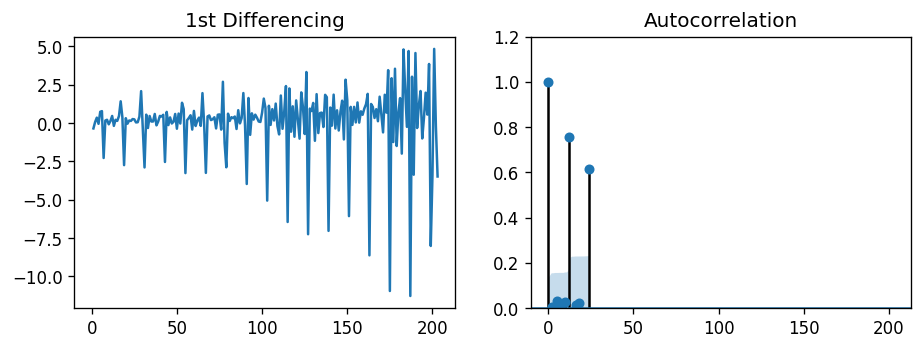

In [ ]:
fig,axes = plt.subplots(1,2,sharex=True)
axes[0].plot(df.value.diff());axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(),ax=axes[1])

plt.show()

# Building ARIMA Model

In [ ]:
# 1,1,1 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Tue, 14 Feb 2023   AIC                            855.524
Time:                        04:59:37   BIC                            865.463
Sample:                             0   HQIC                           859.545
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2         3.8327      0.259     14.790      0.0

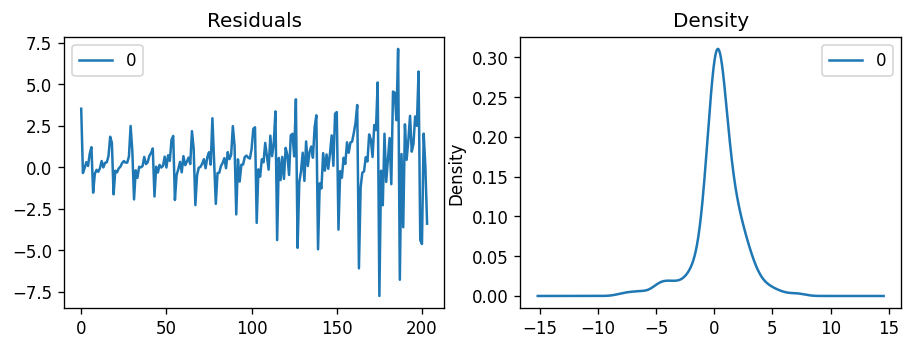

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

In [1]:
# # Build Model
# model = ARIMA(train, order=(3, 2, 1))  
# fitted = model.fit()  
# print(fitted.summary())

# # Forecast
# fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()